Part 1: Data Loading and Preprocessing

1. Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("onlinefoods.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


2. Handle Missing Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


3. Encode Categorical Variables

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies['Feedback'] = (df['Family size'] > 1).astype(int)

print(x.head())
print(y)

4. Feature Selection

In [ ]:
X = df_dummies.drop(['latitude', 'longitude', 'Pin code', 'Family size', 'Feedback'], axis=1)
y = df_dummies['Feedback']

Part 2: Exploratory Data Analysis (EDA)

1. Descriptive Statistics

In [ ]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


The only columns worth to note here are 'Age' and 'Family Size', these 2 columns are more relevant to the 'Feedback' column. There is an intresting correlation to our 'Feedback' that can be taken from people from the age of 24 and above and people with larger families.

2. Visualization

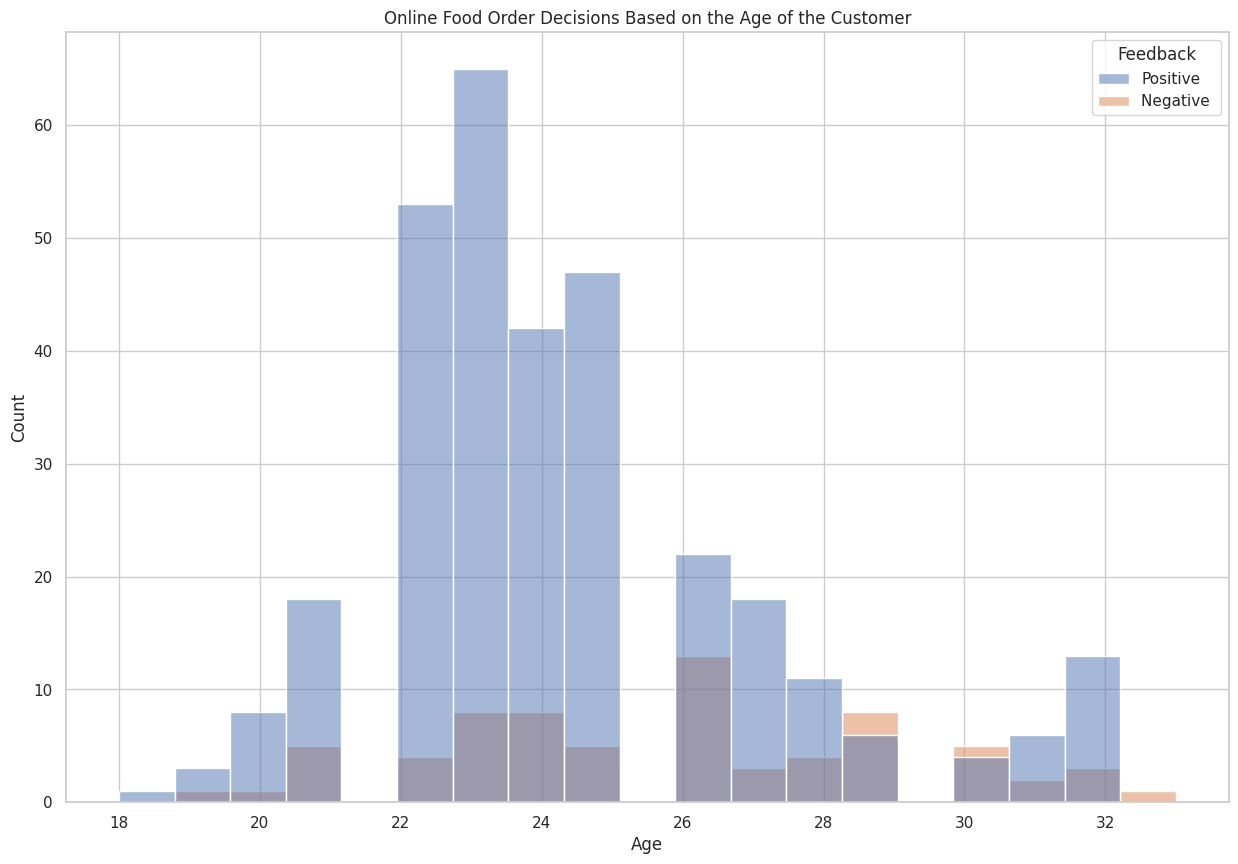

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Feedback", data=df)
plt.show()

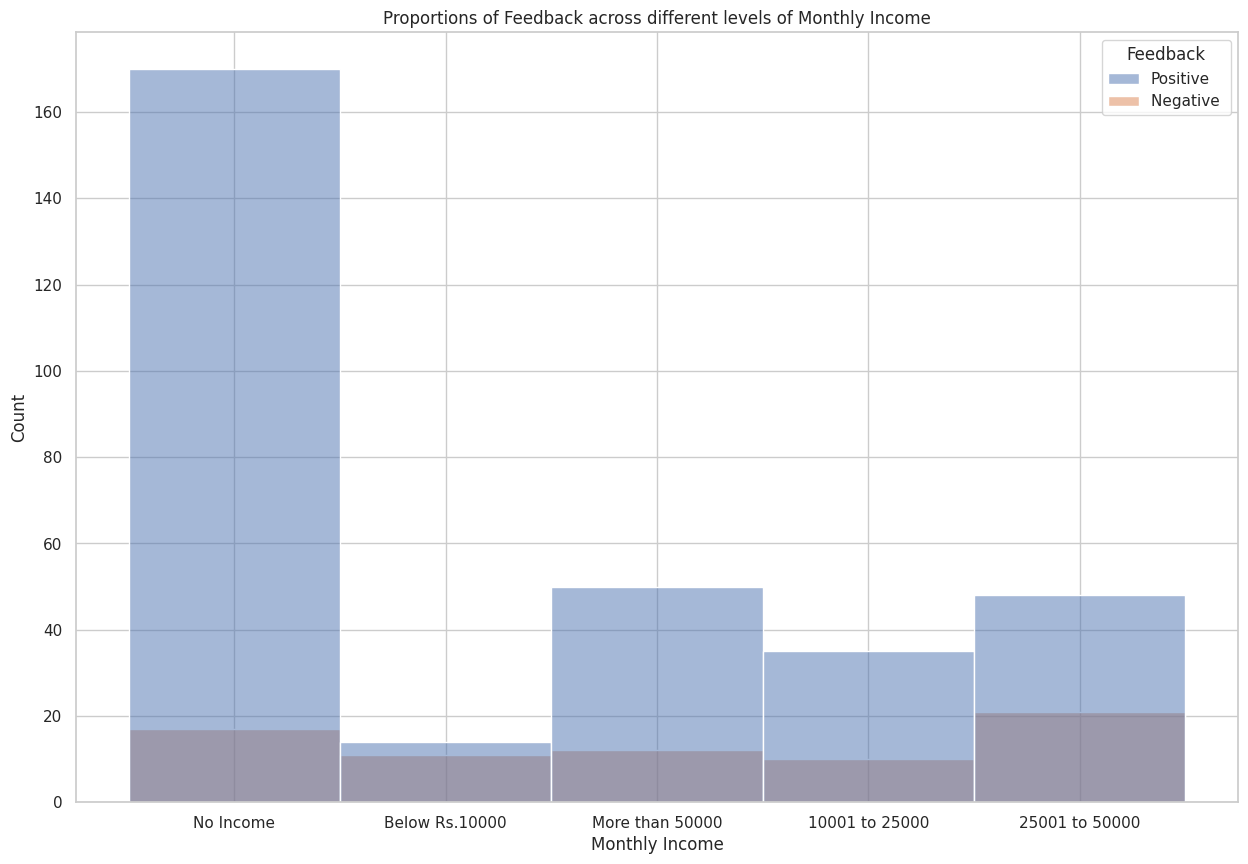

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Proportions of Feedback across different levels of Monthly Income")
sns.histplot(x="Monthly Income", hue="Feedback", data=df)
plt.show()

<ipython-input-482-552bfe4787f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr())


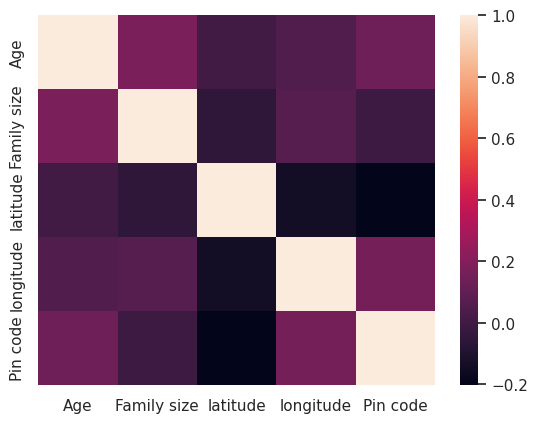

In [ ]:
dataplot = sns.heatmap(df.corr())
plt.show()

Part 3: Logistic Regression Model

1. Build the Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

2. Model Evaluation

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix: {conf_mat}")

Accuracy: 0.9230769230769231
Precision: 0.9230769230769231
Recall: 1.0
Confusion Matrix: [[  0   9]
 [  0 108]]


Part 4: Data Analysis and Visualization

1.	Feature Importance

In [ ]:
feat_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

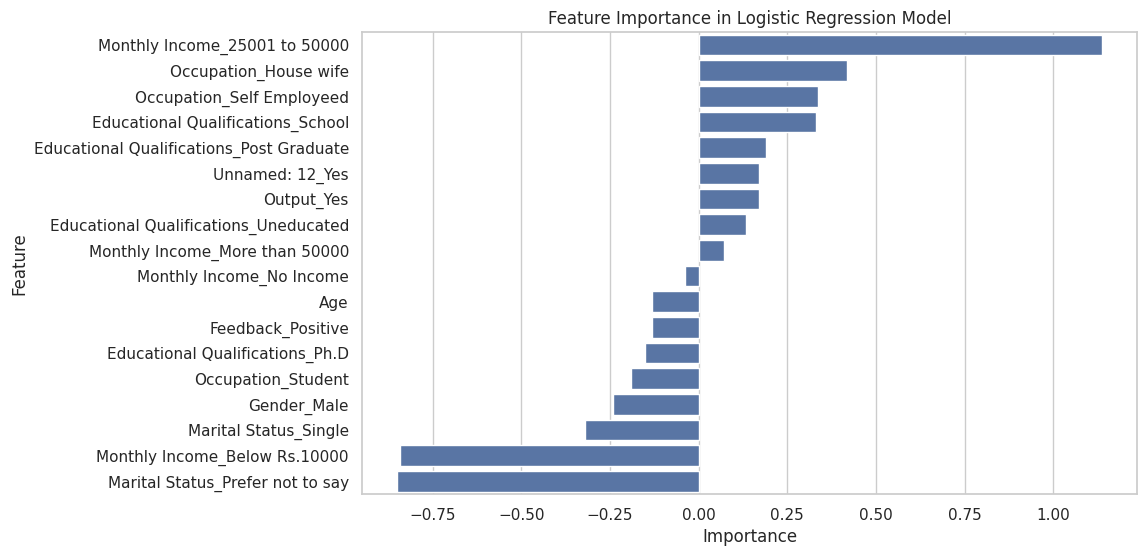

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data = feat_importance)
plt.title("Feature Importance in Logistic Regression Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

A High Income and People who stay at their houses more are highly important according to the Regression Model

2.	Prediction Insights

In [ ]:
y_pred_prob = model.predict_proba(x_test)[:, 1]

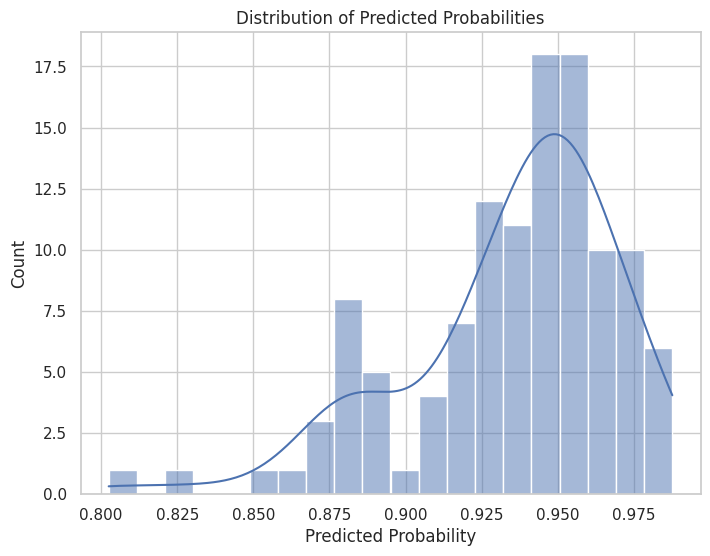

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.show()

According to this visualization of the predicted results, the model is unsure with its predictions.